In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib
import datetime as dt
import statsmodels.api as sm

In [2]:
jan_to_jun_2009 = pd.read_csv("data/2009/jan_to_jun_2009.csv",index_col=0)
jul_to_dec_2009 = pd.read_csv("data/2009/jul_to_dec_2009.csv",index_col=0)
jan_to_jun_2010 = pd.read_csv("data/2010/jan_to_aug_2010.csv",index_col=0)
jul_to_dec_2010 = pd.read_csv("data/2010/sep_to_dec_2010.csv",index_col=0)
jan_to_jun_2011 = pd.read_csv("data/2011/jan_to_jun_2011.csv",index_col=0)
jul_to_dec_2011 = pd.read_csv("data/2011/jul_to_dec_2011.csv",index_col=0)
jan_to_jun_2012 = pd.read_csv("data/2012/jan_to_jun_2012.csv",index_col=0) 
jul_to_dec_2012 = pd.read_csv("data/2012/jul_to_dec_2012.csv",index_col=0)
jan_to_jun_2013 = pd.read_csv("data/2013/jan_to_jun_2013.csv",index_col=0)
jul_to_dec_2013 = pd.read_csv("data/2013/jul_to_dec_2013.csv",index_col=0)
jan_to_jun_2014 = pd.read_csv("data/2014/jan_to_jun_2014.csv",index_col=0)
jul_to_dec_2014 = pd.read_csv("data/2014/jul_to_dec_2014.csv",index_col=0)
jan_to_jun_2015 = pd.read_csv("data/2015/jan_to_jun_2015.csv",index_col=0)
jul_to_dec_2015 = pd.read_csv("data/2015/jul_to_dec_2015.csv",index_col=0)
jan_to_jul_2016 = pd.read_csv("data/2016/jan_to_jul_2016.csv",index_col=0)

/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = pd.concat([jan_to_jun_2009,jul_to_dec_2009,jan_to_jun_2010,jul_to_dec_2010,jan_to_jun_2011,jul_to_dec_2011,jan_to_jun_2012,jul_to_dec_2012,jan_to_jun_2013,jul_to_dec_2013,jan_to_jun_2014,jul_to_dec_2014,jan_to_jun_2015,jul_to_dec_2015,jan_to_jul_2016],axis=0)



In [4]:
df = df.loc[df['RFDE_INSTR_TYPE'] == 'REG_DL_INSTR_EQ']

In [5]:
df = df.rename(columns={'VALUE (in Rs)': 'Sale'})

In [6]:
(df['Sale'] == 0.00).all()

False

In [7]:
df['TR_DATE'] = df['TR_DATE'].astype('datetime64[D]')

In [8]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

In [9]:
df1['Date'] = df['TR_DATE']
df1['Sale'] = df['Sale']

In [10]:
df2['Date'] = df['TR_DATE']
df2['Inflation-Rate'] = df['Inflation-Rate']
df2['twitter'] = df['twitter-sentiment']
df2['BSE_Open'] = df['BSE_Open'] 
df2['BSE_High'] = df['BSE_High'] 
df2['BSE_Low'] = df['BSE_Low']
df2['BSE_Close'] = df['BSE_Close']
df2['FDI-Growth'] = df['FDI-Growth-Rate']
df2['FDI-Inward'] = df['FDI-Inward']
df2['GDP-Growth'] = df['GDP-Growth-Rate']

df2['IIP'] = df['IIP']
df2['unemployment-rate'] = df['unemployment-rate']
df2['forex'] = df['foreign-exchange']

In [11]:
df1 = df1.groupby(['Date']).sum()

In [12]:
df1.to_csv("x.csv")

In [13]:
(df1['Sale'] == 0).all()

False

In [14]:
df1 = df1.reset_index(level='Date')


In [15]:
df2 = df2.groupby(['Date'], as_index=False).mean()

In [16]:
df1['Inflation-Rate'] = df1['Date'].map(df2.set_index('Date')['Inflation-Rate'])
df1['twitter'] = df1['Date'].map(df2.set_index('Date')['twitter'])
df1['BSE_Open'] = df1['Date'].map(df2.set_index('Date')['BSE_Open'])
df1['BSE_High'] = df1['Date'].map(df2.set_index('Date')['BSE_High'])
df1['BSE_Low'] = df1['Date'].map(df2.set_index('Date')['BSE_Low'])
df1['BSE_Close'] = df1['Date'].map(df2.set_index('Date')['BSE_Close'])
df1['FDI-Growth'] = df1['Date'].map(df2.set_index('Date')['FDI-Growth'])
df1['FDI-Inward'] = df1['Date'].map(df2.set_index('Date')['FDI-Inward'])
df1['GDP-Growth'] = df1['Date'].map(df2.set_index('Date')['GDP-Growth'])
df1['IIP'] = df1['Date'].map(df2.set_index('Date')['IIP'])
df1['U-R'] = df1['Date'].map(df2.set_index('Date')['unemployment-rate'])
df1['forex'] = df1['Date'].map(df2.set_index('Date')['forex'])



In [17]:
test2 = df1

In [18]:
(test2['twitter'] == -3).all()

False

In [19]:
#r = pd.date_range(start=test2.Date.min(), end="2016-07-31")
#test2 = test2.set_index('Date').reindex(r).fillna(0.0).rename_axis('Date').reset_index()


In [20]:
test2['U-R'] = test2['U-R'].replace(to_replace=0, method='ffill')
test2['FDI-Inward'] = test2['FDI-Inward'].fillna(method='ffill')

In [21]:
test2.isnull().any()

Date              False
Sale              False
Inflation-Rate    False
twitter           False
BSE_Open          False
BSE_High          False
BSE_Low           False
BSE_Close         False
FDI-Growth        False
FDI-Inward        False
GDP-Growth        False
IIP               False
U-R               False
forex             False
dtype: bool

In [22]:
#test3 = test2.drop(test2[test2.Sale < 1000000000].index)

In [23]:
test3                = test2

In [24]:
(test3['twitter'] == -3).all()

False

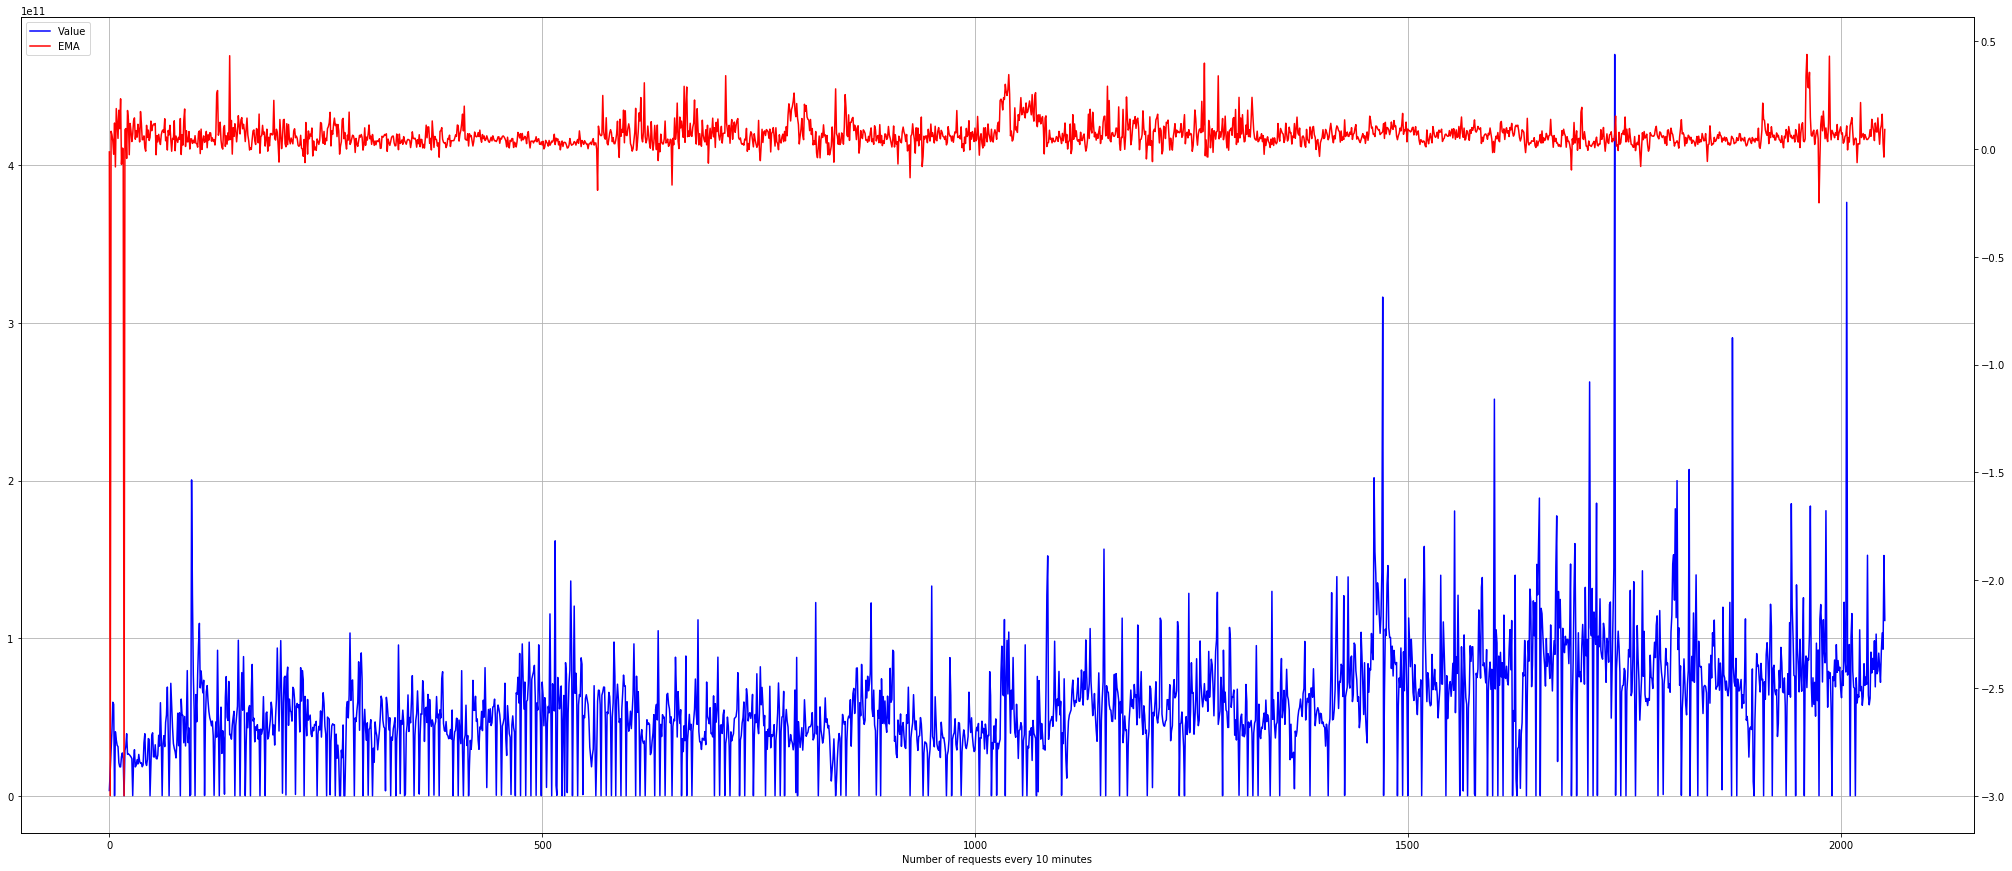

In [25]:
plt.figure(figsize=(35,15))
plt.xlabel('Number of requests every 10 minutes')

ax1 = test3.Sale.plot(color='blue', grid=True, label='Value')
ax2 = test3['twitter'].plot(color='red', grid=True, secondary_y=True, label='EMA')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [26]:
decomposition = sm.tsa.seasonal_decompose(test3.Sale,freq=1000,model='additive')


/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


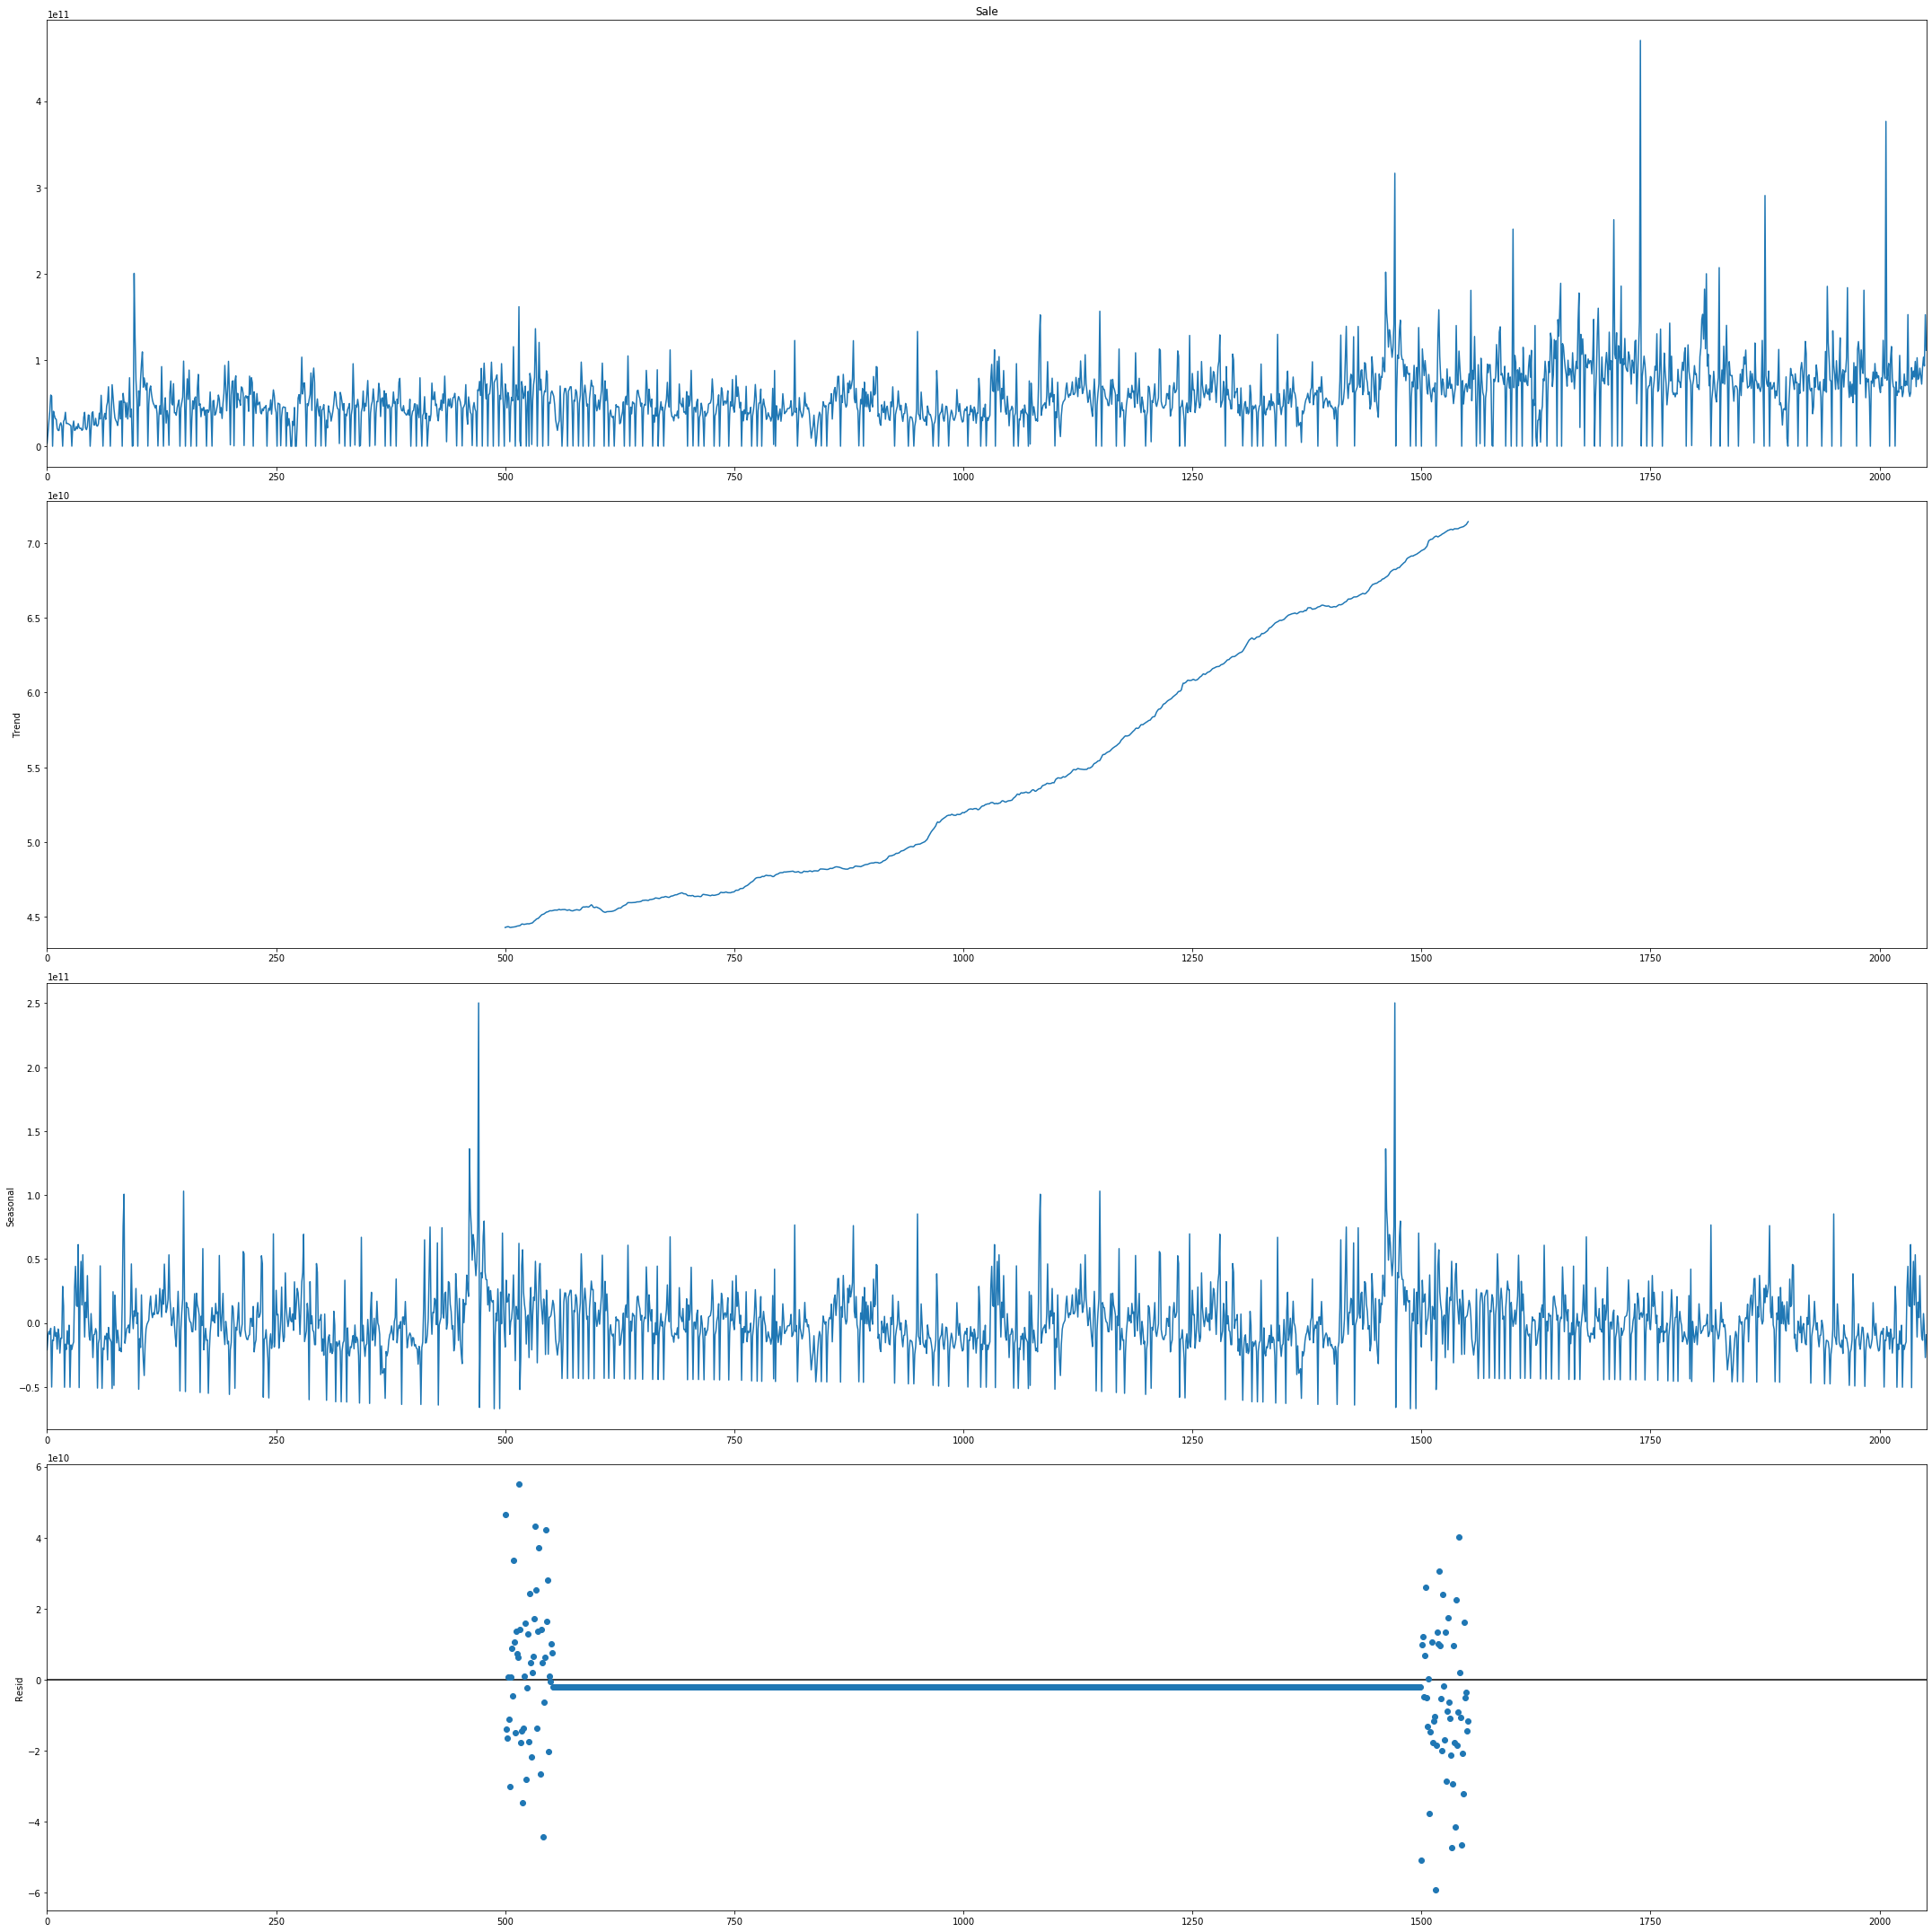

In [33]:
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [30.0,30.0]

In [28]:
from statsmodels.tsa.stattools import acf, pacf

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
test = pd.DataFrame()
test = test3

In [31]:
test3.head(1)

,Date,Sale,Inflation-Rate,twitter,BSE_Open,BSE_High,BSE_Low,BSE_Close,FDI-Growth,FDI-Inward,GDP-Growth,IIP,U-R,forex
0,2009-01-01,3.343394e+09,10.44776,-0.012983,3618.0,3885.52,3190.15,3426.76,0.2,35582.37047,7.861882,80.07885,5.566,48.2825


In [32]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(35,20))
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
plot_acf(test3['log-value'])
pyplot.show()

KeyError: 'log-value'

<Figure size 2520x1440 with 0 Axes>

In [34]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
plot_pacf(test3['log-value'], lags=60)
pyplot.show()

KeyError: 'log-value'

In [35]:
test3['log-value'] = np.log2(test3.Sale)

/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
test3.head(10)

,Date,Sale,Inflation-Rate,twitter,BSE_Open,BSE_High,BSE_Low,BSE_Close,FDI-Growth,FDI-Inward,GDP-Growth,IIP,U-R,forex,log-value
0,2009-01-01,3.343394e+09,10.44776,-0.012983,3618.00,3885.52,3190.15,3426.76,0.2,35582.37047,7.861882,80.07885,5.566,48.2825,31.638666
1,2009-01-02,1.542561e+10,10.44776,-3.000000,3404.67,3529.88,3155.42,3232.11,0.2,35582.37047,7.861882,80.07885,5.566,48.2500,33.844609
2,2009-01-05,2.901384e+10,10.44776,0.082790,4232.99,5562.60,4232.99,5520.25,0.2,35582.37047,7.861882,80.07885,5.566,48.5000,34.756022
3,2009-01-06,4.101809e+10,10.44776,0.066852,5602.13,5886.88,5281.42,5492.03,0.2,35582.37047,7.861882,80.07885,5.566,48.5000,35.255541
4,2009-01-07,5.933185e+10,10.44776,0.037050,5505.98,5987.42,4983.95,5940.38,0.2,35582.37047,7.861882,80.07885,5.566,48.5600,35.788088
5,2009-01-09,5.809227e+10,10.44776,-0.023461,6068.65,6556.46,5932.85,6552.75,0.2,35582.37047,7.861882,80.07885,5.566,48.2600,35.757627
6,2009-01-10,0.000000e+00,10.44776,0.121056,6568.90,6779.19,6126.03,6142.43,0.2,35582.37047,7.861882,80.07885,5.566,48.4540,-inf
7,2009-01-12,4.056081e+10,10.44776,-0.082517,6620.84,6872.18,6529.80,6842.25,0.2,35582.37047,7.861882,80.07885,5.566,48.7800,35.239367
8,2009-01-13,3.553310e+10,10.44776,0.188167,3618.00,3885.52,3190.15,3426.76,0.2,35582.37047,7.861882,80.07885,5.566,48.8900,35.048445
9,2009-01-14,3.202449e+10,10.44776,0.120833,3618.00,3885.52,3190.15,3426.76,0.2,35582.37047,7.861882,80.07885,5.566,48.7500,34.898457


/Users/garg/anaconda3/envs/Thesis-2/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


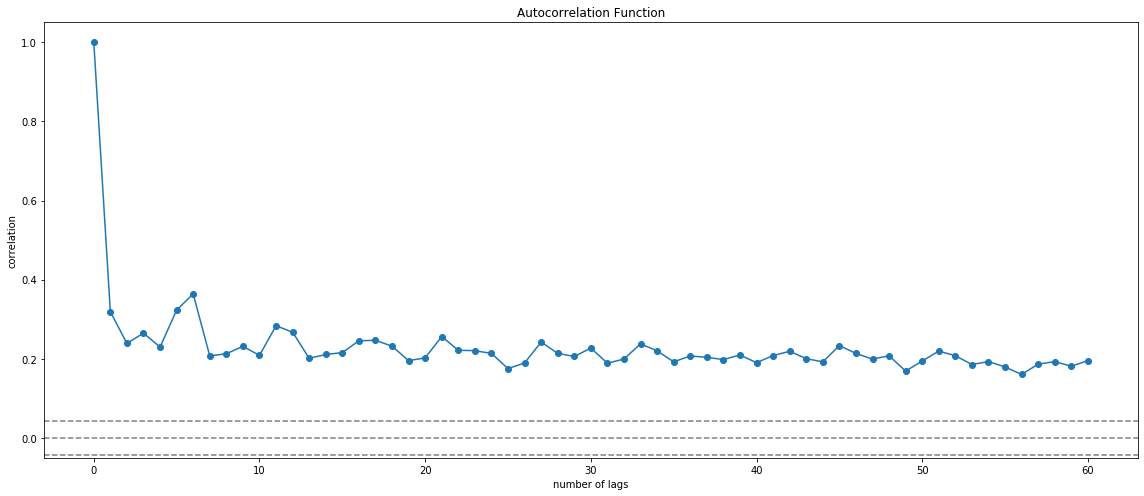

In [37]:
#calling acf function from stattools
lag_acf = acf(test3['Sale'], nlags=60)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(test3['Sale'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(test3['Sale'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

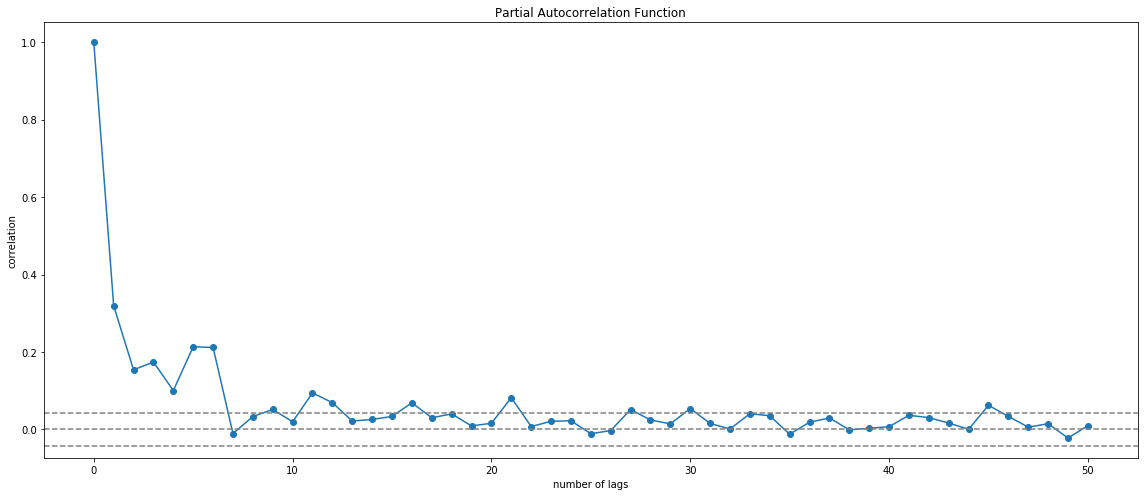

In [38]:
lag_pacf = pacf(test3['Sale'], nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(test3['Sale'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(test3['Sale'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [ ]:
test

In [ ]:
from pandas import Series

In [ ]:
test['diff-sale'] = test['Sale'].diff(1)

In [ ]:
len(test)

In [ ]:
test = test.dropna()

In [ ]:
adf_test(test['diff-sale'])

In [ ]:
test

In [ ]:
array3 = test2.iloc[2050:2051,1:2].to_numpy()

In [ ]:
array3

In [ ]:
len(test)

In [ ]:
del test['Date']
del test['Sale']

In [ ]:
test = test.reset_index()

In [ ]:
test.head(2500)


In [ ]:
del test['index']

In [ ]:
array1 = test.iloc[:2044,0:].to_numpy()

In [ ]:
xforecast = test.iloc[2044:2051,0:].to_numpy()

In [ ]:
array1.shape

In [ ]:
xforecast.shape

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(array1)
normalized = scaler.transform(array1)

In [ ]:
scalar2 = MinMaxScaler(feature_range=(0, 1)) 
scalar2 = scalar2.fit(xforecast)
xforecast_norm = scalar2.transform(xforecast)

In [ ]:
from numpy import hstack
from numpy import array

In [ ]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    #print(len(sequences))
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
		# gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix -1,], sequences[end_ix -1,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
dataset = normalized

In [ ]:
n_steps = 8

In [ ]:
X, y = split_sequences(dataset, n_steps)

In [ ]:
X.shape

In [ ]:
xt = X[:1500,:,:]
yt = y[:1500]


In [ ]:
xv = X[1500:,:,:]
yv=y[1500:]

In [ ]:
n_features = X.shape[2]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from matplotlib import pyplot

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(n_steps -1, n_features)))
model.add(LSTM(100, activation='tanh', return_sequences=True))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')
# fit model
history = model.fit(xt, yt,validation_data=(xv, yv),epochs=300,verbose=1,shuffle=False)
# demonstrate prediction

In [ ]:
model.summary()

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
xforecast_norm.shape

In [ ]:
xforecast_norm = xforecast_norm.reshape((1, len(xforecast_norm), 13))

In [ ]:
yhat = model.predict(xforecast_norm, verbose=0)

In [ ]:
yhat

In [ ]:
z = np.zeros((12,1), dtype=int)

In [ ]:
z = z.reshape(1,12)

In [ ]:
z.shape

In [ ]:
yhat = np.append(z,yhat,axis=1)

In [ ]:
yhat.shape

In [ ]:
yhat = scaler.inverse_transform(yhat)

In [ ]:
yhat

In [ ]:
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [ ]:
c = array3 + yhat[0,12]

In [ ]:
c

In [ ]:
a = test2.iloc[2051:2052,1:2].to_numpy()

In [ ]:
a